In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1)

### Description:

Mikrofonen har høy utgangsimpedans og et lite AC-signal som representerer lydtrykket. For å unngå “flytende” DC-nivå legges inngangen til jord via en stor motstand (10 MΩ)

Første op-amp er en ikke-inverterende buffer (unity gain). Den gir høy inngangsimpedans (lite last på mikrofonen) og lav utgangsimpedans som trygt kan drive neste trinn.

Fordi kretsen går på enkeltforsyning, kan op-ampen ikke håndtere negative spenninger. Vi lager derfor en positiv referanse (Vref ≈ 1.8–2.0 V) med LED+motstand, og lar videre trinn svinge rundt Vref i stedet for 0 V. (I Multisim må LED-parametere justeres for riktig Vref.)

Buffer-utgangen AC-kobles via C1 inn til neste trinn. Sammen med R1 danner C1–R1 et høypassfilter, der knekkfrekvensen er < 16 Hz.

Andre op-amp er inverterende og har en "ground" på ~2V fra Vref

Hele kretsen:
mikrofon → buffer (impedansetilpasning) → AC-kobling (C1) → høypass (R1–C1) → inverterende forsterker med DC-offset (Vref) → ut ca. 1–2 V_pp



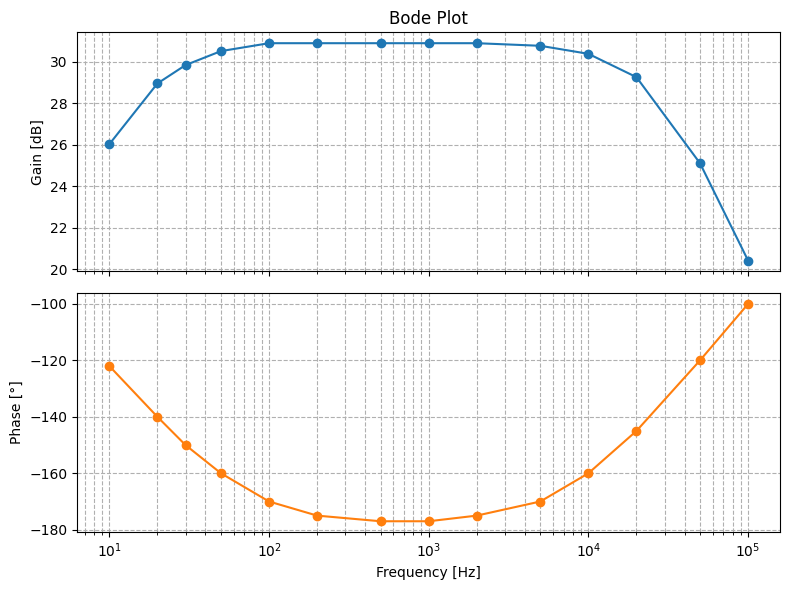

In [5]:
# === MANUAL INPUT ===
# Replace these lists with your own data:
freq = np.array([10, 20, 30, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000])  # Hz
vin = np.array([0.040, 0.040, 0.040, 0.040, 0.040, 0.040, 0.040, 0.040, 0.040, 0.040, 0.040, 0.040, 0.040, 0.040])  # V
vout = np.array([0.800, 1.12, 1.24, 1.34, 1.40, 1.4, 1.4, 1.4, 1.4, 1.38, 1.32, 1.16, 0.720, 0.420])  # V
phase = np.array([-122, -140, -150, -160, -170, -175, -177, -177, -175, -170, -160,-145, -120, -100])  # degrees (optional)

# === CALCULATE ===
gain = vout / vin
gain_db = 20 * np.log10(gain)

# === PLOT ===
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Magnitude (Gain)
ax1.semilogx(freq, gain_db, 'o-', color='C0')
ax1.set_ylabel('Gain [dB]')
ax1.set_title('Bode Plot')
ax1.grid(True, which='both', ls='--')

# Phase
ax2.semilogx(freq, phase, 'o-', color='C1')
ax2.set_ylabel('Phase [°]')
ax2.set_xlabel('Frequency [Hz]')
ax2.grid(True, which='both', ls='--')

plt.tight_layout()
plt.show()